## Keras 소개

Keras는 딥 러닝 모델을 쉽게 구축하고 학습할 수 있도록 도와주는 고수준 딥 러닝 라이브러리입니다.  
초기에는 독립적으로 개발되었지만, 현재는 TensorFlow 라이브러리 내에 포함되어 TensorFlow의 고수준 API로 사용되고 있습니다.   
Keras를 사용하면 복잡한 딥 러닝 모델을 직관적인 방식으로 구성하고 학습할 수 있습니다.

In [23]:
from tensorflow import keras # keras 고수준 api 불러오기
from keras import layers # 퍼셉트론으로 구성된 은닉층, 입력층, 출력층

import numpy as np
import matplotlib.pyplot as plt

## 시나리오: 퍼셉트론 구현해보기
다음의 퍼셉트론을 구현하려고 한다.
* 입력노드 5개
* 출력노드 1개

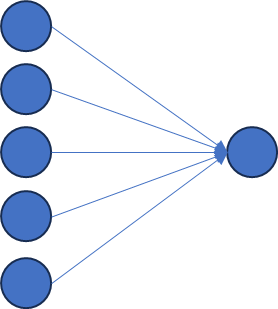

## 준비: 입력 데이터 구성
우선, 입력노드가 5개 이므로, 데이터 포인트 1개는 5개의 변수로 구성되어 있어야 한다.  
이를 위하여 랜덤하게 데이터를 생성하겠다.  
numpy에서는 랜덤하게 데이터를 생성해주는 펑션이 존재한다.

In [24]:
# 랜덤 데이터 생성
X = np.random.rand(1,5) # 데이터 포인트가 1개이지만 2차원으로 데이터를 표현함에 주의 (1행 5열 --> 5개의 변수를 가진 데이터포인트 1개가 존재한다!)
X

array([[0.47540936, 0.97061859, 0.37936011, 0.61502154, 0.73559841]])

## Keras에서 퍼셉트론의 표현

Keras의 Dense 레이어를 사용하여 간단한 퍼셉트론을 표현할 수 있습니다.   
퍼셉트론은 인공 신경망의 가장 기본적인 구성 요소 중 하나로, 입력값을 가중치와 활성화 함수를 통해 출력값으로 변환하는 역할을 합니다.

In [25]:
# 퍼셉트론
l=layers.Dense(1, input_dim=5) # 입력 노드 5개, 출력노드 1개로 구성된 퍼셉트론

In [26]:
l(X)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.7469231]], dtype=float32)>

## 퍼셉트론의 활성화 함수 변경

In [27]:
l=layers.Dense(1, input_dim=5, activation='sigmoid') # 입력 노드 5개, 출력노드 1개로 구성된 퍼셉트론
l(X)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.61862624]], dtype=float32)>

In [28]:
l=layers.Dense(1, input_dim=5, activation='tanh') # 입력 노드 5개, 출력노드 1개로 구성된 퍼셉트론
l(X)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.7650953]], dtype=float32)>

In [29]:
l=layers.Dense(1, input_dim=5, activation='relu') # 입력 노드 5개, 출력노드 1개로 구성된 퍼셉트론
l(X)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.30239263]], dtype=float32)>

## 퍼셉트론 (출력층이 여러 개)

다음과 같이 입력노드 5개, 출력노드 3개인 퍼셉트론을 구현해보자  
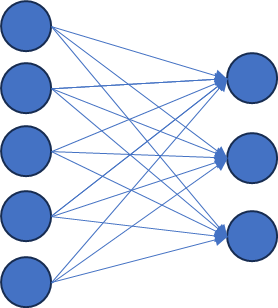!

In [30]:
l = layers.Dense(3,input_dim=5) # output의 갯수를 3개로 바꿔준다.
l(X)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9000881 , 0.69605213, 0.52144384]], dtype=float32)>

## 퍼셉트론 (활성화 함수)

In [31]:
# l = layers.Dense(3, input_shape=[5], activation='sigmoid')
# l = layers.Dense(3, input_shape=[5], activation='tanh')
l = layers.Dense(3, input_shape=[5], activation='relu')
l(X)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.17783564, 0.        , 1.2606144 ]], dtype=float32)>

## 한번에 여러 raw 처리
Dense 레이어는 입력으로 여러 개의 데이터 포인트를 처리할 수 있습니다.  
Keras의 Dense 레이어는 기본적으로 벡터나 행렬 형태의 입력을 다루는 것이기 때문에, 여러 개의 데이터 포인트를 한 번에 처리할 수 있는 구조를 가지고 있습니다.  
데이터 포인트가 1차원 벡터로 표현되는 경우, 2차원 행렬로 여러개의 데이터 포인트를 표현할수 있고, keras의 dense layer는 이를 한번에 연산한다.

In [32]:
# 5차원 데이터 10개 생성
X = np.random.rand(10,5)
X

array([[0.47370395, 0.45955453, 0.2824572 , 0.70663031, 0.45275407],
       [0.91807902, 0.23698509, 0.46993099, 0.52662123, 0.19740431],
       [0.83362744, 0.16589552, 0.14798173, 0.41838924, 0.51562532],
       [0.01023695, 0.16889157, 0.64990592, 0.8275156 , 0.44402568],
       [0.98566087, 0.38540825, 0.31477792, 0.42583367, 0.14571758],
       [0.50188703, 0.83986985, 0.18919198, 0.35649034, 0.03893299],
       [0.32035492, 0.54386735, 0.45924088, 0.08340279, 0.76361295],
       [0.47880295, 0.79334533, 0.87387517, 0.14983299, 0.05782457],
       [0.50145651, 0.17064283, 0.73697196, 0.73213262, 0.93625866],
       [0.60730322, 0.14548552, 0.04158061, 0.05157578, 0.72933966]])

In [33]:
l(X) # 3차원 데이터 10개가 연산되어 나온다.

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.03871346, 0.        , 0.86033404],
       [0.        , 0.        , 0.5849564 ],
       [0.        , 0.        , 0.76613855],
       [0.56280494, 0.        , 0.35893512],
       [0.        , 0.        , 0.7203973 ],
       [0.        , 0.        , 0.8359536 ],
       [0.4116689 , 0.        , 0.6647066 ],
       [0.        , 0.        , 0.3878912 ],
       [0.6211045 , 0.        , 0.69169533],
       [0.12115285, 0.        , 0.66911656]], dtype=float32)>